# Rotina do modulo Passado

In [28]:
import pandas as pd
import numpy as np

dados = pd.read_excel("https://github.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/blob/master/Modulo%206%20-%20Modelos%20M%C3%A9tricas%20e%20Valida%C3%A7%C3%A3o/Dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [29]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [30]:
dados_limpos = preenche_tabela(dados)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,0.163636,0.828977,0.517913,0.517913,0.517913,0.517913,-1.0,-0.958386,-0.958386,-0.958386,-0.958386,-1.0,-0.926916,-0.926916,-0.926916,-0.926916,-1.0,-0.306430,-0.306430,-0.306430,-0.306430,-1.0,-0.305377,-0.305377,-0.305377,-0.305377,-1.0,-0.945935,-0.945935,-0.945935,...,-0.955277,-0.955277,-1.0,-0.073908,-0.339631,-0.267838,-0.458545,0.067973,0.747996,-0.078023,-0.344698,-0.270867,-0.452606,0.064864,0.751914,-0.001207,-0.187010,-0.243988,-0.469278,0.350887,0.841908,-0.248728,-0.432592,-0.313034,-0.381784,-0.017968,0.808029,-0.799862,-0.785938,-0.804580,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,0.370050,0.376636,0.235219,0.235219,0.235219,0.235219,0.0,0.182797,0.182797,0.182797,0.182797,0.0,0.178947,0.178947,0.178947,0.178947,0.0,0.107783,0.107783,0.107783,0.107783,0.0,0.120988,0.120988,0.120988,0.120988,0.0,0.088861,0.088861,0.088861,...,0.125227,0.125227,0.0,0.248552,0.261409,0.241648,0.207736,0.239760,0.119912,0.254493,0.264516,0.247132,0.218765,0.247949,0.119985,0.270201,0.261183,0.260190,0.252147,0.193029,0.236797,0.246389,0.258776,0.274449,0.356890,0.262440,0.132323,0.322680,0.356078,0.324716,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [31]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes #Transformando esse dado em categorico
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.9

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

np.random.seed(73246)


x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo = DummyClassifier()
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.5340909090909091

In [33]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.6818181818181818

# Inicio do Modulo:

## Aula 1

In [34]:
for coluna in dados.columns:
    if coluna not in x_columns:
        print(coluna)

In [35]:
dados_limpos

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0

### Desafio: Transformar a coluna AGE_PERCENTIL em dados categóricos, mas utilizando outro método.

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit_transform(dados_limpos.AGE_PERCENTIL)

array([5, 0, 3, 0, 0, 6, 1, 4, 7, 7, 7, 1, 4, 5, 4, 2, 1, 6, 3, 6, 5, 3,
       7, 8, 1, 3, 6, 7, 8, 2, 6, 2, 2, 6, 6, 2, 2, 1, 4, 3, 3, 4, 6, 8,
       9, 0, 9, 8, 4, 4, 7, 6, 0, 1, 2, 3, 6, 1, 2, 8, 8, 7, 7, 2, 1, 9,
       6, 5, 2, 7, 0, 4, 1, 6, 9, 6, 2, 2, 9, 0, 1, 1, 0, 0, 5, 8, 7, 1,
       2, 5, 7, 9, 4, 9, 6, 9, 3, 0, 5, 3, 9, 1, 0, 9, 1, 1, 7, 0, 6, 5,
       2, 6, 8, 7, 2, 1, 5, 1, 7, 4, 6, 1, 7, 7, 9, 2, 7, 5, 7, 2, 9, 3,
       0, 8, 9, 9, 9, 5, 4, 3, 5, 8, 9, 3, 5, 4, 9, 2, 6, 6, 2, 4, 1, 4,
       0, 5, 1, 5, 0, 2, 2, 0, 4, 5, 8, 4, 0, 2, 4, 2, 1, 6, 2, 2, 5, 1,
       6, 8, 7, 4, 1, 0, 0, 1, 1, 9, 2, 5, 2, 1, 3, 0, 4, 0, 4, 5, 9, 0,
       9, 8, 9, 9, 0, 7, 9, 5, 1, 7, 1, 0, 3, 0, 5, 9, 2, 2, 3, 0, 3, 7,
       4, 9, 5, 8, 3, 3, 4, 7, 5, 2, 9, 0, 6, 7, 3, 7, 1, 1, 3, 1, 9, 5,
       2, 4, 9, 1, 1, 2, 5, 1, 6, 7, 4, 0, 6, 4, 1, 8, 0, 1, 8, 0, 8, 2,
       4, 6, 7, 3, 8, 2, 4, 3, 0, 2, 4, 3, 4, 3, 7, 6, 6, 7, 3, 8, 5, 1,
       5, 3, 8, 3, 4, 5, 9, 5, 2, 3, 0, 6, 8, 7, 0,

In [37]:
dados_limpos["AGE_PERCENTIL"] = le.fit_transform(dados_limpos.AGE_PERCENTIL)

Fim do desafio

## Aula 2

In [38]:
dados_limpos["AGE_PERCENTIL"].value_counts()

1    42
2    39
3    38
0    37
7    36
4    34
6    34
9    34
5    30
8    28
Name: AGE_PERCENTIL, dtype: int64

In [39]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier()

modelo_arvore.fit(x_train,y_train)
predicao_arvore = modelo_arvore.predict(x_test)

accuracy_score(y_test, predicao_arvore)

0.6477272727272727

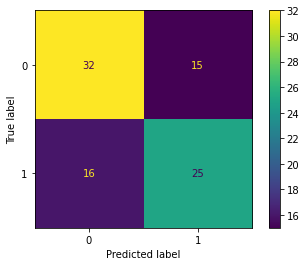

In [40]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

plot_confusion_matrix(modelo_arvore, x_test, y_test)

In [41]:
VP = 25
VN = 32
FP = 15
FN = 16

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicao_arvore))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        47
           1       0.62      0.61      0.62        41

    accuracy                           0.65        88
   macro avg       0.65      0.65      0.65        88
weighted avg       0.65      0.65      0.65        88



In [43]:
 VP/(VP+FP)

0.625

### Desafio: Plotar a Arvore de decisão

[Text(765.3337912087912, 1258.0457142857144, 'X[2] <= 6.5\ngini = 0.497\nsamples = 264\nvalue = [142, 122]'),
 Text(610.8873626373627, 1164.857142857143, 'X[130] <= -0.567\ngini = 0.453\nsamples = 190\nvalue = [124, 66]'),
 Text(498.2142857142857, 1071.6685714285716, 'X[54] <= -0.858\ngini = 0.405\nsamples = 170\nvalue = [122, 48]'),
 Text(395.50549450549454, 978.48, 'X[196] <= -0.288\ngini = 0.346\nsamples = 153\nvalue = [119, 34]'),
 Text(312.72527472527474, 885.2914285714287, 'X[208] <= -0.786\ngini = 0.295\nsamples = 139\nvalue = [114, 25]'),
 Text(288.1978021978022, 792.1028571428571, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(337.25274725274727, 792.1028571428571, 'X[71] <= -0.816\ngini = 0.263\nsamples = 135\nvalue = [114, 21]'),
 Text(245.27472527472528, 698.9142857142858, 'X[180] <= -0.774\ngini = 0.184\nsamples = 117\nvalue = [105, 12]'),
 Text(183.95604395604397, 605.7257142857143, 'X[223] <= -0.724\ngini = 0.121\nsamples = 108\nvalue = [101, 7]'),
 Text(134.901098901

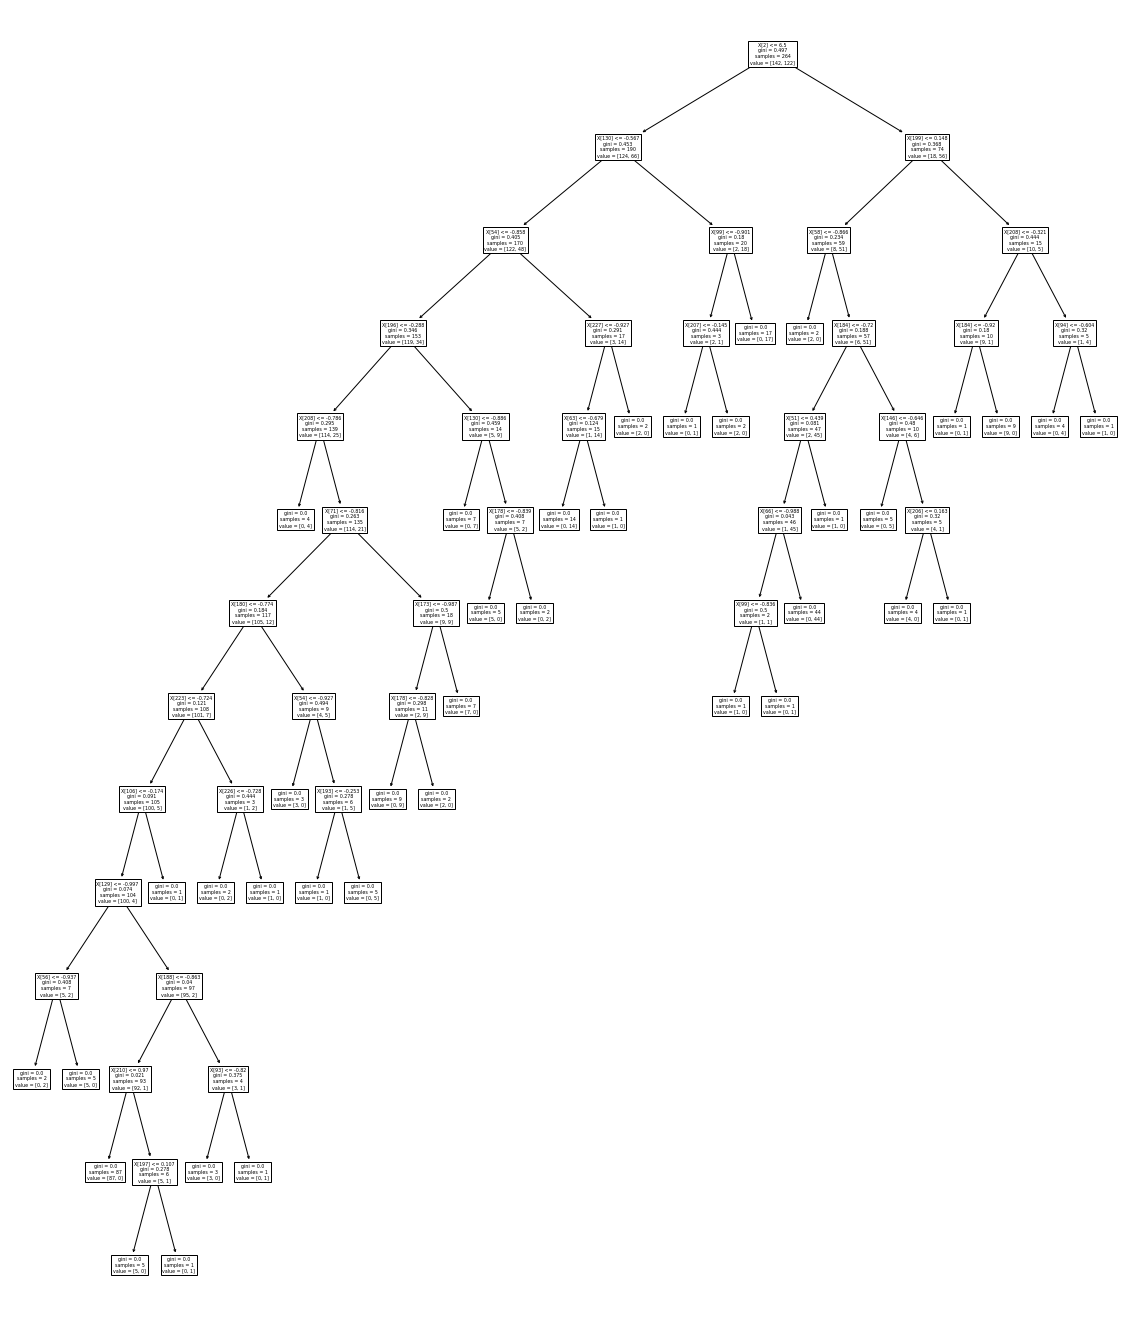

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,24))
plot_tree(modelo_arvore)

Fim Desafio

In [45]:
from sklearn.metrics import roc_auc_score

prob_arvore = modelo_arvore.predict_proba(x_test)
roc_auc_score(y_test, prob_arvore[:,1]) #somente colunas 1

0.6453035806953815

In [46]:
def roda_modelo(modelo, dados):
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
    modelo.fit(x_train, y_train)
    predicao = modelo.predict(x_test)
    prob_predict = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predict[:,1])
    
    print(f"AUC: {auc}")
    print('\nClassification Report')
    print(classification_report(y_test,predicao))

In [47]:
roda_modelo(modelo_arvore, dados_limpos)

AUC: 0.7000518941359627

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.77      0.73        47
           1       0.70      0.63      0.67        41

    accuracy                           0.70        88
   macro avg       0.70      0.70      0.70        88
weighted avg       0.70      0.70      0.70        88



### Desafio: Criar uma função que gere a curva ROC

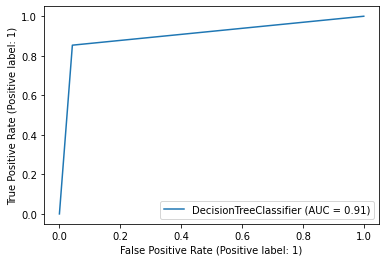

In [48]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(modelo_arvore,x_test, y_test) 

Fim do desafio

In [49]:
def roda_n_modelo(modelo, dados,n):
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    auc_lista=[]
    for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
        modelo.fit(x_train, y_train)
        predicao = modelo.predict(x_test)
        prob_predict = modelo.predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predict[:,1])
        auc_lista.append(auc)
    auc_medio = np.mean(auc_lista)  
    auc_std = np.std(auc_lista)
    print(f"AUC: {auc_medio}")
    print('\nClassification Report')
    print(classification_report(y_test,predicao))
    print(f"Intervado: {auc_medio - 2*auc_std} - {auc_medio + 2*auc_std}")

In [50]:
roda_n_modelo(modelo_arvore, dados_limpos,50)

AUC: 0.6286455630513752

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        47
           1       0.51      0.51      0.51        41

    accuracy                           0.55        88
   macro avg       0.54      0.54      0.54        88
weighted avg       0.55      0.55      0.55        88

Intervado: 0.5332835116593849 - 0.7240076144433655


In [51]:
roda_n_modelo(modelo, dados_limpos,50)

AUC: 0.7540425531914893

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        47
           1       0.69      0.59      0.63        41

    accuracy                           0.68        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.68      0.68      0.68        88

Intervado: 0.6742902079055579 - 0.8337948984774206


### Desafio Testar outro Modelo

In [53]:
from sklearn.neural_network import MLPClassifier

modelo_neural = MLPClassifier(solver='lbfgs',max_iter=10000)
modelo_neural.fit(x_train,y_train)
predicao_neural = modelo_neural.predict(x_test)

accuracy_score(y_test, predicao_neural)

0.6363636363636364

In [54]:
roda_n_modelo(modelo_neural, dados_limpos,10) #50 demora muito

AUC: 0.7170731707317073

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        47
           1       0.71      0.59      0.64        41

    accuracy                           0.69        88
   macro avg       0.70      0.69      0.69        88
weighted avg       0.69      0.69      0.69        88

Intervado: 0.6361372156234886 - 0.798009125839926


## Validação Cruzada

In [56]:
from sklearn.model_selection import cross_validate

cross_validate(modelo, x, y, cv=5) #CV = quantidade de divisões

{'fit_time': array([0.4693253 , 0.55013752, 0.42083359, 0.13067007, 0.37835503]),
 'score_time': array([0.00301147, 0.00437665, 0.00296569, 0.00291038, 0.00331187]),
 'test_score': array([0.71830986, 0.76056338, 0.77142857, 0.72857143, 0.71428571])}

In [57]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits =5 , shuffle=True) #embaralhar dados

cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.38184619, 0.14448714, 0.1759479 , 0.16104555, 0.47687221]),
 'score_time': array([0.00461912, 0.00536537, 0.00355244, 0.0070591 , 0.00589156]),
 'test_score': array([0.69014085, 0.78873239, 0.71428571, 0.54285714, 0.71428571])}

 ### Desafio: Testar outros splitter classes

In [74]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=.30, random_state=0)


resultados = cross_validate(modelo, x, y, cv=cv)

auc_medio = np.mean(resultados['test_score'])  
auc_std = np.std(resultados['test_score'])
print(f"AUC: {auc_medio}")
print(f"Intervado: {auc_medio - 2*auc_std} - {auc_medio + 2*auc_std}")

AUC: 0.720754716981132
Intervado: 0.644719088001472 - 0.796790345960792


Fim do Desafio

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits =5 , n_repeats=10) #embaralhar dados 10 vezes

cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.18136954, 0.4994204 , 0.43000793, 0.49646926, 0.18132353,
        0.45299983, 0.11179233, 0.37725282, 0.48890662, 0.42403603,
        0.45797801, 0.43779182, 0.42123699, 0.2071929 , 0.13296747,
        0.36757922, 0.46640301, 0.46777487, 0.43176031, 0.52761936,
        0.45356059, 0.1492722 , 0.37126398, 0.43542552, 0.20700908,
        0.44861221, 0.4821434 , 0.22725725, 0.40594268, 0.42123246,
        0.16675925, 0.23314953, 0.4705987 , 0.18913579, 0.18768358,
        0.50259137, 0.19242287, 0.41391563, 0.41131997, 0.19118285,
        0.40032315, 0.15094781, 0.53229523, 0.43610382, 0.21301293,
        0.50080371, 0.17109895, 0.10317135, 0.40708542, 0.54002714]),
 'score_time': array([0.00434566, 0.00432491, 0.00667739, 0.00366664, 0.00282383,
        0.00350237, 0.00323343, 0.00429821, 0.00341344, 0.00597787,
        0.00494766, 0.00484705, 0.00513315, 0.0036881 , 0.00335383,
        0.00344205, 0.00395465, 0.00369763, 0.00549769, 0.00426531,
        0.00404334, 

In [65]:
def roda_n_modelo_cv(modelo, dados,n_splits, n_repeats):
    
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True) #embaralhar antes de passar pro modelo
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    cv = RepeatedStratifiedKFold(n_splits =n_splits , n_repeats=n_repeats) 
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc')

    auc_medio = np.mean(resultados['test_score'])  
    auc_std = np.std(resultados['test_score'])
    print(f"AUC: {auc_medio}")
    print(f"Intervado: {auc_medio - 2*auc_std} - {auc_medio + 2*auc_std}")

In [64]:
roda_n_modelo_cv(modelo, dados_limpos, 5,10)

AUC: 0.7576929097159361
Intervado: 0.6352056752094273 - 0.8801801442224448


In [62]:
roda_n_modelo(modelo, dados_limpos,50)

AUC: 0.7661650233523613

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        47
           1       0.66      0.61      0.63        41

    accuracy                           0.67        88
   macro avg       0.67      0.67      0.67        88
weighted avg       0.67      0.67      0.67        88

Intervado: 0.6932261583924852 - 0.8391038883122373


In [75]:
roda_n_modelo_cv(modelo_arvore, dados_limpos, 5,10)

AUC: 0.6279279683391525
Intervado: 0.4988394445682657 - 0.7570164921100394


In [84]:
modelo_arvore = DecisionTreeClassifier(max_depth=6)

roda_n_modelo_cv(modelo_arvore, dados_limpos, 5,10)

AUC: 0.6239047951959137
Intervado: 0.46637314891829074 - 0.7814364414735366


In [90]:
def roda_modelo_cv(modelo, dados,n_splits, n_repeats):
    
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True) #embaralhar antes de passar pro modelo
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
    cv = RepeatedStratifiedKFold(n_splits =n_splits , n_repeats=n_repeats) 
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)

    auc_medio = np.mean(resultados['test_score'])  
    auc_medio_treino = np.mean(resultados['train_score'])  
    auc_std = np.std(resultados['test_score'])
    #print(f"AUC: {auc_medio}")
    #print(f"Intervado: {auc_medio - 2*auc_std} - {auc_medio + 2*auc_std}")
    #print(f"AUC TEST: {auc_medio_treino}")
    return auc_medio, auc_medio_treino

In [94]:
print(roda_modelo_cv(modelo_arvore, dados_limpos, 5,10))

(0.6256292095025647, 0.9998695491440995)


In [100]:
teste_lista=[]
treino_lista=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5,10)
    teste_lista.append(teste)
    treino_lista.append(treino)

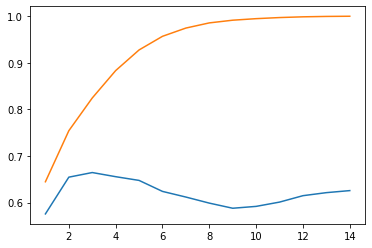

In [102]:
x = range(1,15)

plt.plot(x,teste_lista)
plt.plot(x,treino_lista)

In [103]:
from sklearn.ensemble import RandomForestClassifier

teste_lista=[]
treino_lista=[]
for i in range(1,15):
    modelo_arvore = RandomForestClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5,10)
    teste_lista.append(teste)
    treino_lista.append(treino)

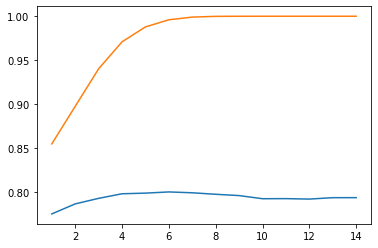

In [104]:
x = range(1,15)

plt.plot(x,teste_lista)
plt.plot(x,treino_lista)

In [107]:
modelo_arvore = RandomForestClassifier(n_estimators=10)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5,10)
print(teste,treino)

0.7428159147484805 0.999444041300827


In [108]:
modelo_arvore = RandomForestClassifier(n_estimators=100)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5,10)
print(teste,treino)

0.7939557739557739 1.0


In [109]:
modelo_arvore = RandomForestClassifier(n_estimators=500)
teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5,10)
print(teste,treino)

0.798442632225527 1.0


### Desafio Salvar um modelo treinado

In [116]:
import pickle

modelo_arvore = RandomForestClassifier(n_estimators=100)
modelo_arvore.fit(x_train,y_train)

nome_modelo_salvar = 'Modelo_salvo.sav'
pickle.dump(modelo_arvore,open(nome_modelo_salvar, 'wb'))

In [117]:

y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)

recuperando_modelo = pickle.load(open(nome_modelo_salvar,'rb'))
resultado = recuperando_modelo.score(x,y)


print(resultado)

0.9289772727272727


Fim desafio

## Aula 6 - Dados Correlacionados

In [118]:
dados_limpos.corr()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,1.000000,-0.017361,0.031159,0.071961,0.058683,0.022828,0.045907,-0.026074,-0.005678,0.021964,0.024226,0.010275,-0.023086,-0.016204,-0.016204,-0.016204,-0.016204,NaN,0.060057,0.060057,0.060057,0.060057,NaN,0.012442,0.012442,0.012442,0.012442,NaN,0.062804,0.062804,0.062804,0.062804,NaN,0.029109,0.029109,0.029109,0.029109,NaN,0.018022,0.018022,...,-0.047713,-0.047713,NaN,0.095052,0.074880,0.076525,0.021779,-0.011847,-0.023686,0.093877,0.069839,0.077927,0.002525,-0.014158,-0.024354,0.096918,0.096265,0.081255,0.043287,0.000536,-0.014310,0.077751,0.057881,0.063673,0.015626,-0.020210,-0.024753,-0.040615,-0.082139,-0.038959,-0.046410,-0.045353,-0.018859,-0.051978,-0.080779,-0.059587,-0.030755,-0.045456,-0.015996,-0.041382
AGE_ABOVE65,-0.017361,1.000000,0.874773,0.031830,0.280326,0.051308,0.165905,0.032608,0.314536,0.003930,0.330744,0.169178,0.137186,-0.111907,-0.111907,-0.111907,-0.111907,NaN,0.069056,0.069056,0.069056,0.069056,NaN,0.097612,0.097612,0.097612,0.097612,NaN,0.018202,0.018202,0.018202,0.018202,NaN,0.054441,0.054441,0.054441,0.054441,NaN,0.021730,0.021730,...,0.071340,0.071340,NaN,-0.146802,0.222891,-0.223129,0.104568,-0.086413,-0.109800,-0.148504,0.220684,-0.207480,0.100707,-0.083182,-0.101247,-0.125120,0.221515,-0.232097,0.101549,-0.093789,-0.100968,-0.138507,0.210206,-0.222678,0.092669,-0.076399,-0.119952,-0.012655,-0.026278,0.012440,-0.005558,0.028262,-0.030515,0.009262,-0.039387,0.002790,-0.021190,0.029317,-0.031404,0.291010
AGE_PERCENTIL,0.031159,0.874773,1.000000,0.056211,0.294671,0.058015,0.134016,0.014480,0.334920,-0.035015,0.324703,0.201001,0.146246,-0.136709,-0.136709,-0.136709,-0.136709,NaN,0.046929,0.046929,0.046929,0.046929,NaN,0.147365,0.147365,0.147365,0.147365,NaN,0.000752,0.000752,0.000752,0.000752,NaN,0.031365,0.031365,0.031365,0.031365,NaN,0.015729,0.015729,...,0.063952,0.063952,NaN,-0.140119,0.269342,-0.201195,0.186620,-0.057003,-0.126255,-0.147229,0.265043,-0.186933,0.182667,-0.055100,-0.120971,-0.115272,0.272013,-0.204079,0.182024,-0.055767,-0.111780,-0.129059,0.249877,-0.208085,0.167176,-0.055859,-0.136280,-0.014140,-0.049698,-0.018826,-0.007992,-0.006030,-0.040314,0.013580,-0.062474,-0.037260,-0.040807,-0.004185,-0.039724,0.351071
GENDER,0.071961,0.031830,0.056211,1.000000,0.036528,-0.001784,-0.064757,-0.069768,-0.019812,-0.020573,-0.013136,-0.026982,0.054201,-0.089776,-0.089776,-0.089776,-0.089776,NaN,-0.018091,-0.018091,-0.018091,-0.018091,NaN,0.018961,0.018961,0.018961,0.018961,NaN,0.039055,0.0390

In [120]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(5), object(1)
memory usage: 658.4+ KB


In [124]:
dados_limpos.select_dtypes(exclude='float64') #verificando os dados que nao sao numericos, não faz sentido usar os dados abaixo como correlação

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,
0,0,0,1,5,0,0-2,1
2,10,2,0,0,0,0-2,1
3,15,3,0,3,1,0-2,0
4,20,4,0,0,0,0-2,0
5,25,5,0,0,0,0-2,0
...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0-2,1
381,1905,381,1,9,0,0-2,0
382,1910,382,0,4,0,0-2,1


In [126]:
dados_limpos.iloc[:4:-2].corr().abs()# correlaçao em numeros absolutos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,1.000000,0.088860,0.065966,0.063721,0.033292,0.053328,0.047762,0.057475,0.032020,0.045373,0.029859,0.040353,0.028619,0.138796,0.138796,0.138796,0.138796,NaN,0.023626,0.023626,0.023626,0.023626,NaN,0.027547,0.027547,0.027547,0.027547,NaN,0.068726,0.068726,0.068726,0.068726,NaN,0.006386,0.006386,0.006386,0.006386,NaN,0.081322,0.081322,...,0.044156,0.044156,NaN,0.155552,0.051406,0.144250,0.096032,0.042823,0.041159,0.148876,0.041072,0.149733,0.077274,0.046008,0.029507,0.151625,0.075666,0.135189,0.111408,0.009863,0.062760,0.129998,0.039423,0.138520,0.096168,0.073113,0.041290,0.046033,0.071789,0.017527,0.019454,0.147256,0.049774,0.057399,0.060074,0.015192,0.009468,0.145266,0.044616,0.007413
AGE_ABOVE65,0.088860,1.000000,0.874930,0.010445,0.334006,0.017582,0.091045,0.023138,0.277837,0.076521,0.338537,0.199006,0.084512,0.046045,0.046045,0.046045,0.046045,NaN,0.062168,0.062168,0.062168,0.062168,NaN,0.028145,0.028145,0.028145,0.028145,NaN,0.007139,0.007139,0.007139,0.007139,NaN,0.010191,0.010191,0.010191,0.010191,NaN,0.037959,0.037959,...,0.031343,0.031343,NaN,0.239556,0.207941,0.225283,0.095385,0.115342,0.099369,0.232303,0.207618,0.209156,0.101847,0.117932,0.086985,0.224787,0.193149,0.235184,0.087990,0.098198,0.110043,0.216002,0.199931,0.222129,0.086763,0.124556,0.097236,0.031821,0.005281,0.017167,0.010700,0.065317,0.030201,0.064024,0.004004,0.013564,0.018694,0.061931,0.029332,0.326154
AGE_PERCENTIL,0.065966,0.874930,1.000000,0.031432,0.362805,0.077221,0.106219,0.031255,0.341704,0.097906,0.364305,0.219573,0.098455,0.094869,0.094869,0.094869,0.094869,NaN,0.018575,0.018575,0.018575,0.018575,NaN,0.067067,0.067067,0.067067,0.067067,NaN,0.041641,0.041641,0.041641,0.041641,NaN,0.010343,0.010343,0.010343,0.010343,NaN,0.011634,0.011634,...,0.038772,0.038772,NaN,0.250341,0.237142,0.175765,0.117330,0.067940,0.090144,0.251978,0.234229,0.162783,0.126634,0.064941,0.082441,0.237917,0.221555,0.181934,0.106343,0.047056,0.099750,0.213685,0.231588,0.175760,0.109269,0.087628,0.085456,0.057048,0.010337,0.003358,0.023565,0.096168,0.033544,0.096741,0.002921,0.032526,0.026314,0.093770,0.034011,0.364186
GENDER,0.063721,0.010445,0.031432,1.000000,0.091329,0.081238,0.090959,0.099786,0.046542,0.129584,0.016044,0.053206,0.089933,0.173543,0.173543,0.173543,0.173543,NaN,0.050209,0.050209,0.050209,0.050209,NaN,0.004424,0.004424,0.004424,0.004424,NaN,0.076623,0.076623,0.076623,0.076623,NaN,0.062046,0.062046,0.062046,0.062046,NaN,0.005706,0.005706,...,0.025930,0.025930,

In [127]:
alta_corr = 0.95
matrix_corr = dados_limpos.iloc[:4:-2].corr().abs()

for coluna in matrix_corr
any(matrix_corr[] >alta_corr)

In [128]:
matrix_corr.shape

(230, 230)

In [132]:
np.ones(matrix_corr.shape).astype(bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [137]:
np.triu(np.ones(matrix_corr.shape), k=1).astype(bool) # Removendo diagonal e tudo abaixo dela

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [138]:
matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,NaN,0.08886,0.065966,0.063721,0.033292,0.053328,0.047762,0.057475,0.032020,0.045373,0.029859,0.040353,0.028619,0.138796,0.138796,0.138796,0.138796,NaN,0.023626,0.023626,0.023626,0.023626,NaN,0.027547,0.027547,0.027547,0.027547,NaN,0.068726,0.068726,0.068726,0.068726,NaN,0.006386,0.006386,0.006386,0.006386,NaN,0.081322,0.081322,...,0.044156,0.044156,NaN,0.155552,0.051406,0.144250,0.096032,0.042823,0.041159,0.148876,0.041072,0.149733,0.077274,0.046008,0.029507,0.151625,0.075666,0.135189,0.111408,0.009863,0.062760,0.129998,0.039423,0.138520,0.096168,0.073113,0.041290,0.046033,0.071789,0.017527,0.019454,0.147256,0.049774,0.057399,0.060074,0.015192,0.009468,0.145266,0.044616,0.007413
AGE_ABOVE65,NaN,NaN,0.874930,0.010445,0.334006,0.017582,0.091045,0.023138,0.277837,0.076521,0.338537,0.199006,0.084512,0.046045,0.046045,0.046045,0.046045,NaN,0.062168,0.062168,0.062168,0.062168,NaN,0.028145,0.028145,0.028145,0.028145,NaN,0.007139,0.007139,0.007139,0.007139,NaN,0.010191,0.010191,0.010191,0.010191,NaN,0.037959,0.037959,...,0.031343,0.031343,NaN,0.239556,0.207941,0.225283,0.095385,0.115342,0.099369,0.232303,0.207618,0.209156,0.101847,0.117932,0.086985,0.224787,0.193149,0.235184,0.087990,0.098198,0.110043,0.216002,0.199931,0.222129,0.086763,0.124556,0.097236,0.031821,0.005281,0.017167,0.010700,0.065317,0.030201,0.064024,0.004004,0.013564,0.018694,0.061931,0.029332,0.326154
AGE_PERCENTIL,NaN,NaN,NaN,0.031432,0.362805,0.077221,0.106219,0.031255,0.341704,0.097906,0.364305,0.219573,0.098455,0.094869,0.094869,0.094869,0.094869,NaN,0.018575,0.018575,0.018575,0.018575,NaN,0.067067,0.067067,0.067067,0.067067,NaN,0.041641,0.041641,0.041641,0.041641,NaN,0.010343,0.010343,0.010343,0.010343,NaN,0.011634,0.011634,...,0.038772,0.038772,NaN,0.250341,0.237142,0.175765,0.117330,0.067940,0.090144,0.251978,0.234229,0.162783,0.126634,0.064941,0.082441,0.237917,0.221555,0.181934,0.106343,0.047056,0.099750,0.213685,0.231588,0.175760,0.109269,0.087628,0.085456,0.057048,0.010337,0.003358,0.023565,0.096168,0.033544,0.096741,0.002921,0.032526,0.026314,0.093770,0.034011,0.364186
GENDER,NaN,NaN,NaN,NaN,0.091329,0.081238,0.090959,0.099786,0.046542,0.129584,0.016044,0.053206,0.089933,0.173543,0.173543,0.173543,0.173543,NaN,0.050209,0.050209,0.050209,0.050209,NaN,0.004424,0.004424,0.004424,0.004424,NaN,0.076623,0.076623,0.076623,0.076623,NaN,0.062046,0.062046,0.062046,0.062046,NaN,0.005706,0.005706,...,0.025930,0.025930,NaN,0.032979,0.015682,0.014005,0.100609,0.102775,0.

In [140]:
matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))

colunas_excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > alta_corr)]

In [143]:
def remove_var_corr(dados, valor_corte):
    matrix_corr = dados.iloc[:4:-2].corr().abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
    colunas_excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]
    return dados.drop(colunas_excluir, axis=1)

In [144]:
dados_limpos_sem_corr = remove_var_corr(dados_limpos, 0.95)

In [145]:
dados_limpos_sem_corr

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,...,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,...,-1.0,0.234043,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,...,-1.0,0.234043,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,...,-1.0,0.234043,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,...,-1.0,0.234043,-1.0,0.363636,-1.0,-0.457944,-1.0,-0.592593,-1.0,0.939394,-1.0,0.345679,-1.0,0.142857,-1.0,-0.998507,-1.0,-0.991235,-1.0,-0.846633,-1.0,-0.903614,-1.0,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,0.291405,-1.0,-1.0,...,-1.0,0.234043,-1.0,0.363636,-1.0,-0.292390,-1.0,-0.666667,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.997947,-1.0,-0.988948,-1.0,-0.846633,-1.0,-0.884337,-

In [146]:
roda_modelo_cv(modelo_arvore, dados_limpos,5,10)

(0.7939557739557739, 1.0)

In [147]:
roda_modelo_cv(modelo_arvore, dados_limpos_sem_corr,5,10)

(0.7988475122850123, 1.0)

### Desafio: Plotar matriz de confusão para o dados limpos sem correlaçao

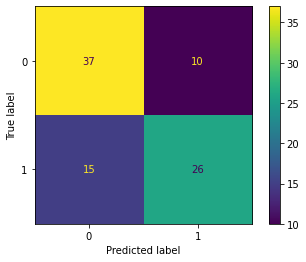

In [148]:
plot_confusion_matrix(modelo_arvore, x_test, y_test)

In [153]:
np.random.seed(823746)
dados = dados_limpos_sem_corr.sample(frac=1).reset_index(drop=True)
x_columns = dados.columns
y = dados["ICU"]
x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo_arvore = RandomForestClassifier(n_estimators=100)
modelo_arvore.fit(x_train,y_train)

RandomForestClassifier()

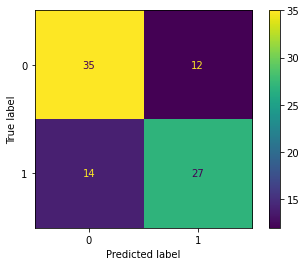

In [154]:
plot_confusion_matrix(modelo_arvore, x_test, y_test)

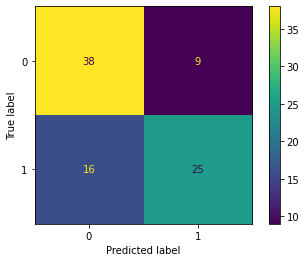

In [155]:
modelo_neural = MLPClassifier(solver='lbfgs',max_iter=10000)
modelo_neural.fit(x_train,y_train)
plot_confusion_matrix(modelo_neural, x_test, y_test)